<a href="https://colab.research.google.com/github/Capriel2003/TensorFlow/blob/main/DeepNetwork-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000, 10)


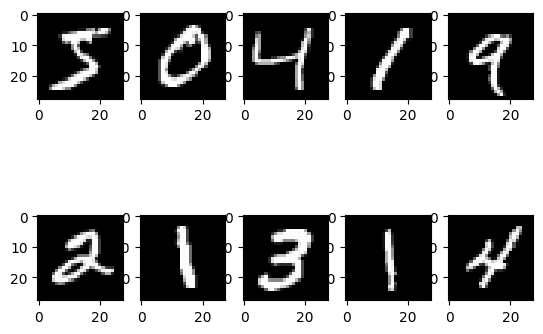

In [ ]:
# Chargement du jeu de données MNIST
(img_train, label_train),(img_test,label_test) = keras.datasets.mnist.load_data()
# Normalisation des images pour que les valeurs des pixels soient entre 0 et 1
img_train=img_train/255.0
img_test=img_test/255.0
# Conversion des étiquettes en vecteurs one-hot de taille 10 (numero de classes)
output_train=keras.utils.to_categorical(label_train, num_classes=10)
output_test=keras.utils.to_categorical(label_test, num_classes=10)
# Vérification des dimensions des ensembles d’entraînement
print(img_train.shape)
print(output_train.shape)
# Affichage de quelques exemples d’images du dataset
for i in range(10):
 plt.subplot(2,5,i+1)
 plt.imshow(img_train[i], cmap='gray')
plt.show()

In [ ]:
# Initialisation du modèle séquentiel
model = keras.Sequential( )
# Première couche: aplatissement des images 28x28 en un vecteur de taille 784
model.add(keras.layers.Flatten(input_shape=(28, 28)))
# Couche cachée de 20 neurones avec fonction d’activation sigmoïde
model.add(keras.layers.Dense(20, activation='sigmoid'))
# Couche de sortie de 10 neurones (une par chiffre 0–9)
model.add(keras.layers.Dense(10, activation='sigmoid'))

# Autre façon d'initialiser le model
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(20, activation='sigmoid'),
    keras.layers.Dense(10, activation='sigmoid')
])

# Affichage du résumé du modèle
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,910 (62.15 KB)

 Trainable params: 15,910 (62.15 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Définition de la fonction de perte et de l’optimiseur
loss = keras.losses.MeanSquaredError()
optim = keras.optimizers.SGD(learning_rate=0.05)

# Compilation du modèle avec les métriques souhaitées
model.compile(loss=loss, optimizer=optim, metrics=["accuracy"])

In [ ]:
# Entraînement du modèle sur les données d’apprentissage
model.fit(img_train, output_train, batch_size=4, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
15000/15000 - 24s - 2ms/step - accuracy: 0.5231 - loss: 0.0764
Epoch 2/20
15000/15000 - 22s - 1ms/step - accuracy: 0.7677 - loss: 0.0469
Epoch 3/20
15000/15000 - 21s - 1ms/step - accuracy: 0.8451 - loss: 0.0343
Epoch 4/20
15000/15000 - 22s - 1ms/step - accuracy: 0.8735 - loss: 0.0279
Epoch 5/20
15000/15000 - 20s - 1ms/step - accuracy: 0.8849 - loss: 0.0242
Epoch 6/20
15000/15000 - 22s - 1ms/step - accuracy: 0.8918 - loss: 0.0219
Epoch 7/20
15000/15000 - 22s - 1ms/step - accuracy: 0.8969 - loss: 0.0203
Epoch 8/20
15000/15000 - 20s - 1ms/step - accuracy: 0.9013 - loss: 0.0191
Epoch 9/20
15000/15000 - 22s - 1ms/step - accuracy: 0.9041 - loss: 0.0181
Epoch 10/20
15000/15000 - 20s - 1ms/step - accuracy: 0.9072 - loss: 0.0174
Epoch 11/20
15000/15000 - 21s - 1ms/step - accuracy: 0.9095 - loss: 0.0167
Epoch 12/20
15000/15000 - 21s - 1ms/step - accuracy: 0.9117 - loss: 0.0162
Epoch 13/20
15000/15000 - 20s - 1ms/step - accuracy: 0.9136 - loss: 0.0157
Epoch 14/20
15000/15000 - 22s - 1m

In [ ]:
# Évaluation du modèle sur les données de test
model.evaluate(img_test,output_test, batch_size=4, verbose=2)

2500/2500 - 3s - 1ms/step - accuracy: 0.9263 - loss: 0.0132


[0.013216003775596619, 0.9262999892234802]

In [ ]:
# Test sur 50 images : prédiction du chiffre et comparaison avec le label réel
for i in range(50):
 output=model.predict(img_test[i:i+1,:,:])
 print(label_test[i]," , ",output.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
7  ,  7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
2  ,  2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1  ,  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
0  ,  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4  ,  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1  ,  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4  ,  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
9  ,  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
5  ,  6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
9  ,  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
0  ,  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
6  ,  6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
9  ,  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
0  ,  0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1  ,  1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
5  ,  5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
9  ,  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
7  ,  7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
3  ,  3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
4  ,  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
9  ,  9
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/s